# Projeto 1 - Ciência dos Dados

Nome: Alfredo Villela
7/Nome: Pedro Peretto


Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [87]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [88]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\OneDrive\Documentos\cdados\Projeto1-


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [89]:
filename = 'Ruffles.xlsx'

In [90]:
train = pd.read_excel(filename)
train.head(5)

,Treinamento,Classificação,Unnamed: 2,Relevante,Irrelevante
0,"@natialiauai amiga sinto muito, mas sou doida ...",1,NaN,1.0,0.0
1,@dannypeppers_ amg eu te perdoo dessa vez pq e...,1,NaN,NaN,NaN
2,@disicks mas ruffles e coca tambem é veg amiga...,1,NaN,NaN,NaN
3,n sei o q dá na cabeça da pessoa em trocar pri...,1,NaN,NaN,NaN
4,@falaanarosa ruffles cebola e salsa e chocolate,0,NaN,NaN,NaN


In [91]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Classificação
0,queria deixar minha raiva aqui com a fraude ch...,1.0
1,meu namorado deveria ver isso e mandar uma ruf...,1.0
2,@katrynnebarross o guaraná até vai agora o ruf...,1.0
3,@d0y0ungflower eu não gosto de ruffles pra mim...,1.0
4,"comer uma ruffles, deu vontade",1.0


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

Descrição: É um salgadinho de batata chips
Classificação: como relevantes consideramos tweets que davam opiniões sobre o produto e sobre seus sabores. Como irrelevantes consideramos aqueles que não tinham relação com a qualidade do produto.

ESCREVA AQUI...

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [92]:
treino = train.iloc[:,[0,1]]
treino.tail(20)

,Treinamento,Classificação
280,petição para mudar o nome das ruffles presunto...,0
281,@marianagatzk @ruffles @pringles simmmmmm... c...,0
282,batata ruffles original é melhor que todos os ...,1
283,@ruffles_oficial @elmachips fui fazer o cadast...,0
284,uma batata ruffles pequena 7 conto? gente pelo...,0
285,só que com ruffles,0
286,ruffles de churrasco eh a melhor que tem,1
287,@jeeehcarolinee vamos ficar na torcida pra ele...,1
288,@pepeubigboy @katrynnebarross ruffles é uma da...,1
289,@_gvmmos sabe o q e um pontinho amarelo no mar...,1


In [93]:
import re 


def cleanup(text):
    pontuacao = '[!-.:?;|"]'
    pattern = re.compile(pontuacao)
    text_subbed = re.sub(pattern, '', text)
    return text_subbed
    
def limpaarroba (string):
    palavras = []
    lista = string.split()
    for p in lista:
        if p[0] == '@':
            palavras.append(p)
    for palavra in palavras:
        lista.remove(palavra)
    clean = ' '.join(lista)
    return clean

def limpalink (string):
    palavras = []
    lista = string.split()
    for p in lista:
        if p[0] == 'h' and p[1] == 't' and p[2] == 't' and p[3] == 'p' and p[4] == 's':
            palavras.append(p)
    for palavra in palavras:
        lista.remove(palavra)
    clean = ' '.join(lista)
    return clean

def limpalinha (string):
    palavras = []
    lista = string.split()
    for p in lista:
        clean = p.rstrip("\n")
        palavras.append(clean)
    tweet = " ".join(palavras)
    return tweet




In [94]:
treino.Treinamento = treino.Treinamento.apply(cleanup)
treino.Treinamento = treino.Treinamento.apply(limpaarroba)
treino.Treinamento = treino.Treinamento.apply(limpalink)
treino.Treinamento = treino.Treinamento.apply(limpalinha)

treino.head(20)

C:\Users\pedro\anaconda3\Nova pasta\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Treinamento,Classificação
0,amiga sinto muito mas sou doida por ruffles😭😭😭😭😭,1
1,amg eu te perdoo dessa vez pq eu amo ruffles d...,1
2,mas ruffles e coca tambem é veg amiga veja bem,1
3,n sei o q dá na cabeça da pessoa em trocar pri...,1
4,ruffles cebola e salsa e chocolate,0
5,só terminar essa ruffles c coca cola e tô enco...,0
6,cerveja com ruffles ou doritos é perfeito demais,1
7,só queria uma ruffles de salsa e cebola 😔😔,1
8,vontade de comer um ruffles de cebola ou de ch...,1
9,tô aqui comendo uma ruffles e do nada lembrei ...,0


In [95]:
irrelevante = treino.loc[treino['Classificação']==0,['Treinamento']]
relevante = treino.loc[treino['Classificação']==1,['Treinamento']]

In [96]:
lista_irrelevante = []

for x in irrelevante['Treinamento']:
    palavras = x.split()
    for p in palavras:
        lista_irrelevante.append(p)

lista_relevante = []

for x in relevante['Treinamento']:
    palavras1 = x.split()
    for p in palavras1:
        lista_relevante.append(p)

lista_total = []

for x in treino['Treinamento']:
    todas = x.split()
    for p in todas:
        lista_total.append(p)



serie_total = pd.Series(lista_total)
tabela_total = serie_total.value_counts(True)
tabela_total



ruffles    0.063965
de         0.045898
e          0.036865
que        0.020996
eu         0.018066
             ...   
chama      0.000244
tazos      0.000244
colapso    0.000244
pesado     0.000244
max        0.000244
Length: 1335, dtype: float64

In [97]:
serie_irrelevante = pd.Series(lista_irrelevante)
tabela_irrelevante = serie_irrelevante.value_counts(True)
tabela_irrelevante

ruffles    0.060262
de         0.040175
e          0.037991
que        0.018777
o          0.017904
             ...   
─          0.000437
estaria    0.000437
daquele    0.000437
modelo     0.000437
max        0.000437
Length: 937, dtype: float64

In [98]:
serie_relevante = pd.Series(lista_relevante)
tabela_relevante = serie_relevante.value_counts(True)
tabela_relevante

ruffles       0.068660
de            0.053156
e             0.035437
que           0.023810
eu            0.018826
                ...   
salsa🌿        0.000554
canudinhos    0.000554
afazenda13    0.000554
lá            0.000554
radioativa    0.000554
Length: 662, dtype: float64

In [99]:
prob_irrelevante = len(lista_irrelevante)/len(lista_total)

prob_relevante = len(lista_relevante)/len(lista_total)

print(prob_irrelevante)
print(prob_relevante)
print(prob_relevante + prob_irrelevante)

0.55908203125
0.44091796875
1.0


In [100]:
list_tabelas = [tabela_irrelevante, tabela_relevante]
list_listas= [lista_irrelevante, lista_relevante]

tabela_irrelevante

ruffles    0.060262
de         0.040175
e          0.037991
que        0.018777
o          0.017904
             ...   
─          0.000437
estaria    0.000437
daquele    0.000437
modelo     0.000437
max        0.000437
Length: 937, dtype: float64

In [101]:
def classifica(string, tabelas, listas):
    f = 1
    i = 0
    soma = 0
    y = 0
    lista_resultado = []
    vezes = 1
    for tabela in tabelas:
        soma = 0
        y += 1
        vezes = 1
        for lista in listas:
            for palavra in string.split():
                if soma >= len(string.split()) :
                    break
                if palavra in tabela:
                    f = (1 + tabela[palavra])
                    soma += 1
                else:
                    f = 1
                    soma += 1
                i += 1
                vezes *= f
        lista_resultado.append(vezes)
    if lista_resultado.index(max(lista_resultado)) == 0:
        return 'irrelevante'
    elif lista_resultado.index(max(lista_resultado)) == 1:
        return 'relevante'


print(classifica('gostei muito da ruffles de churrasco', list_tabelas, list_listas))

relevante


In [102]:
classificado = []
for a  in treino.Treinamento:
    função = classificador(a,list_tabelas, list_listas)
    classificado.append(função)

treino['Aplicado'] = classificado

treino.head(10)

<ipython-input-102-42bffd235c6a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino['Aplicado'] = classificado


,Treinamento,Classificação,Aplicado
0,amiga sinto muito mas sou doida por ruffles😭😭😭😭😭,1,relevante
1,amg eu te perdoo dessa vez pq eu amo ruffles d...,1,relevante
2,mas ruffles e coca tambem é veg amiga veja bem,1,relevante
3,n sei o q dá na cabeça da pessoa em trocar pri...,1,relevante
4,ruffles cebola e salsa e chocolate,0,relevante
5,só terminar essa ruffles c coca cola e tô enco...,0,relevante
6,cerveja com ruffles ou doritos é perfeito demais,1,relevante
7,só queria uma ruffles de salsa e cebola 😔😔,1,relevante
8,vontade de comer um ruffles de cebola ou de ch...,1,relevante
9,tô aqui comendo uma ruffles e do nada lembrei ...,0,relevante


In [103]:
test.head()
teste = test.iloc[:,[0,1]]
teste['Teste']= teste['Teste'].apply(cleanup)
teste['Teste']= teste['Teste'].apply(limpaarroba)
teste['Teste']= teste['Teste'].apply(limpalink)
teste['Teste']= teste['Teste'].apply(limpalinha)

classificado_teste = []
for x in teste.Teste:
    função = classificador(x,list_tabelas, list_listas)
    classificado_teste.append(função)

teste['Aplicado'] = classificado_teste

teste.head(10)

,Teste,Classificação,Aplicado
0,queria deixar minha raiva aqui com a fraude ch...,1.0,relevante
1,meu namorado deveria ver isso e mandar uma ruf...,1.0,irrelevante
2,o guaraná até vai agora o ruffles cara,1.0,irrelevante
3,eu não gosto de ruffles pra mim tem gosto estr...,1.0,relevante
4,comer uma ruffles deu vontade,1.0,relevante
5,é aceitável jantar ruffles com coca cola,1.0,relevante
6,mkjkkkk manda um aqui pra casa pfv 🕵🏽‍♂️ eu di...,0.0,irrelevante
7,super apaixonei🧀🥓,0.0,irrelevante
8,quero tanto uma pringles ou um ruffles de chur...,1.0,relevante
9,doritos e ruffles eu chamo de ruffles mas todo...,0.0,relevante


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [104]:
def mudapnumero(nivel):
    if nivel == 'irrelevante':
        return 0
    else:
        return 1


valoresteste = []
for x in teste['Classificação']:
    valoresteste.append(x)

valorescalc = []
for y in teste.Aplicado:
    valor = mudapnumero(y)
    valorescalc.append(valor)

acertos = 0
total = 0
i=0
while i <= len(valorescalc)-1:
    if valoresteste[i] == valorescalc[i]:
        acertos+=1
    total+=1
    i+=1

qualidade = (acertos/total)*100

print(" acertou em {}% das vezes".format(qualidade))

 acertou em 56.49999999999999% das vezes


In [110]:
fpositivos = 0
vpositivos = 0
i = 0
total = 0

while i < len(valorescalc):
    if valorescalc[i] == 1:
        if valoresteste[i]: 
            vpositivos +=1
        else: 
            fpositivos += 1
    i+=1
    total+=1

fpositivos *= 100
vpositivos *= 100

print('Falsos positivos: {}%'.format(fpositivos/total))
print('Verdadeiros positivos: {}%'.format(vpositivos/total))

Falsos positivos: 39.5%
Verdadeiros positivos: 48.0%


In [115]:
fnegativo = 0
vnegativo = 0
i = 0
total = 0

while i < len(valorescalc):
    if valorescalc[i] == 0 :
        if valoresteste[i] == 0:
            vnegativo +=1
        else: 
            fnegativo += 1
    i+=1
    total+=1


fnegativo *= 100
vnegativo *= 100
print('Falsos negativos: {}%'.format(fnegativo/total))
print('Verdadeiros negativos: {}%'.format(vnegativo/total))


Falsos negativos: 3.5%
Verdadeiros negativos: 9.0%


In [114]:
print((vnegativo+fnegativo+fpositivos+vpositivos)/total)

100.0


___
### Concluindo

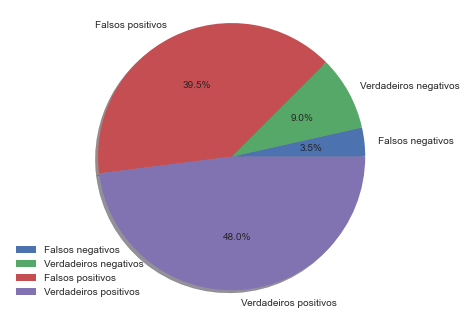

In [113]:
import matplotlib.pyplot as plt

labels = 'Falsos negativos', 'Verdadeiros negativos', 'Falsos positivos', 'Verdadeiros positivos'
sizes = [fnegativo, vnegativo, fpositivos, vpositivos]

fig1, ax1 = plt.subplots()
ax1.pie (sizes, labels=labels, autopct='%1.1f%%', shadow = True)

plt.style.use("seaborn")
plt.legend(labels, loc=3)
ax1.axis('equal')
plt.show()

    Concluimos que o classificador não foi ruim, com uma acurácia de 56%. O número de falsos positivos e falsos negativos   foi menor do que o de verdadeiros positivos e verdadeiros negativos. O motivo da acurácia não ter sido maior se resume ao fato do método utilizado partir do pressuposto de que as palavras não possuem conexões que resulta nas suas probabilidades serem calculadas individualmente, interferindo nessa acurácia. 
    Além disso, o método não diferenciava mensagens contendo ironia ou frases sem sentido, interferindo no resultado final.

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**